## Worgroup 5

- Andrea Ulloa
- Ángela Coapaza
- Ana Ángulo

### Bootstrapping

In [1]:
library(ISLR2)
set.seed(1)
library(boot)

In [2]:
data_penn <- as.data.frame(read.table("../../data/penn_jae.dat", header=T ))

In [3]:
# Quedandome solo con las observaciones del tratamiento 4 y control
data_penn<- subset(data_penn, tg==4 | tg==0)
attach(data_penn)
T4<- (tg==4)
summary(T4)

   Mode   FALSE    TRUE 
logical    3354    1745 

In [4]:
dim(data_penn)

[1] 5099   23

#### STEPS

##### Step 1
First, we create a function boot.fn(), which takes the data set and the set of indices for the observations as arguments. The function returns the intercept and slope estimates for the linear regression model defined in the function.

In [5]:
boot.fn <- function(data, index)
  coef(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd) , data = data, subset = index))

##### Step 2

Second, we apply that function to the entire data set, the base $datapenn$, which is 5,099 observations. Doing this is the same as performing simple regression without using the function. We get the same coefficients. For example, the coefficient for T4 is -0.07169, for female it is 0.126368 and for black it is -0.29376.

In [6]:
boot.fn(data_penn, 1:5099) 

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
 2.178462326 -0.071692484  0.126368328 -0.293767980 -0.472445058  0.029866899 
factor(dep)2           q2           q3           q4           q5           q6 
 0.096186517  0.073678072 -0.038506537 -0.054949195 -0.144177912  0.003361318 
     agelt35      agegt54      durable         lusd         husd 
-0.162772168  0.229666708  0.126557359 -0.175352572 -0.105224727

In [7]:
ols = lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = data_penn)
ols


Call:
lm(formula = log(inuidur1) ~ T4 + (female + black + othrace + 
    factor(dep) + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + 
    durable + lusd + husd), data = data_penn)

Coefficients:
 (Intercept)        T4TRUE        female         black       othrace  
    2.178462     -0.071692      0.126368     -0.293768     -0.472445  
factor(dep)1  factor(dep)2            q2            q3            q4  
    0.029867      0.096187      0.073678     -0.038507     -0.054949  
          q5            q6       agelt35       agegt54       durable  
   -0.144178      0.003361     -0.162772      0.229667      0.126557  
        lusd          husd  
   -0.175353     -0.105225  


##### Step 3

Next, let's see how this changes if we choose a sample of the data with replacement (this is bootstrapping). Now the coefficient of T4 is -0.12279, of female is 0.15065 and of black -0.38063. This is because different data is being used.

In [8]:
set.seed(0)
boot.fn(data_penn, sample(1:5099, 5099, replace = T))

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
 2.259116432 -0.122798931  0.150650120 -0.380631692 -0.629980305  0.005306129 
factor(dep)2           q2           q3           q4           q5           q6 
 0.090659496  0.001184484 -0.122812967 -0.122959139 -0.188794386  0.036211324 
     agelt35      agegt54      durable         lusd         husd 
-0.152704729  0.192703662  0.084924858 -0.158110489 -0.094781946

##### Step 4

Bootstrapping is doing what was done before, but often outsampling with replacement. Perform the regression on them and obtain the estimated coefficients. For each coefficient of the variable, a more precise standard error can be obtained than the one we obtain when doing the simple regression with the original data.

In [9]:
reg_lineal = boot(data_penn, boot.fn, 1000)
reg_lineal # ¿Cómo obtener los valores std.error del cuadro de abajo? 


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_penn, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  0.0012832697  0.15865465
t2*  -0.071692484 -0.0005860200  0.03489811
t3*   0.126368328 -0.0013043846  0.03455738
t4*  -0.293767980 -0.0009245988  0.05761879
t5*  -0.472445058 -0.0077422757  0.24210824
t6*   0.029866899 -0.0003484188  0.05536533
t7*   0.096186517  0.0022106925  0.04551685
t8*   0.073678072 -0.0008127062  0.15700186
t9*  -0.038506537  0.0002238988  0.15575116
t10* -0.054949195 -0.0003289622  0.15612960
t11* -0.144177912 -0.0006477493  0.15593809
t12*  0.003361318 -0.0008459619  0.16878399
t13* -0.162772168 -0.0005475727  0.03675451
t14*  0.229666708  0.0035442268  0.05676727
t15*  0.126557359 -0.0012015760  0.04974203
t16* -0.175352572  0.0002818018  0.04136647
t17* -0.105224727  0.0001764256  0.04420184

In [10]:
ols = lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = data_penn)
summary(ols)$coeff

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.178462326,0.15901507,13.69972271,5.631260e-42
T4TRUE,-0.071692484,0.03546326,-2.02159887,4.327012e-02
female,0.126368328,0.03482493,3.62867401,2.876799e-04
black,-0.293767980,0.05297556,-5.54534899,3.081966e-08
othrace,-0.472445058,0.19839750,-2.38130547,1.728801e-02
factor(dep)1,0.029866899,0.05414025,0.55165799,5.812070e-01
factor(dep)2,0.096186517,0.04686228,2.05253621,4.016868e-02
q2,0.073678072,0.15682593,0.46980799,6.385124e-01
q3,-0.038506537,0.15647802,-0.24608272,8.056281e-01
q4,-0.054949195,0.15656019,-0.35097809,7.256193e-01


The estimates of the standard error for the estimates of T4, female and black by regressing a simple OLS are somewhat different than with the bootstrap method. The bootstrap approach does not rely on any assumptions about standard errors, in contrast to the classical linear model. Therefore, the bootstrap method is likely to provide a more accurate estimate of the standard errors of the estimates of the variables in the model that was regressed.

In [12]:
#install.packages("xtable")
library(xtable)
table<- matrix(0, 3, 2)

table[1,1]<-  summary(ols)$coeff[2,2]
table[2,1]<-  summary(ols)$coeff[3,2]
table[3,1]<-  summary(ols)$coeff[4,2]

table[1,2]<-  0.03489811
table[2,2]<-  0.03455738
table[3,2]<-  0.05761879

colnames(table)<- c("Original","Bootstrapping")
rownames(table)<- c("Std.error(T4)", "Std.error(female)", "Std.error(black)")
tab<- xtable(table, digits=5)
tab

,Original,Bootstrapping
,<dbl>,<dbl>
Std.error(T4),0.03546326,0.03489811
Std.error(female),0.03482493,0.03455738
Std.error(black),0.05297556,0.05761879


### Comparative models

#### Data

In [15]:
load("../../data/cps2012.RData")
dim(data)

[1] 29217    23

In [20]:
head(data)

,year,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1663459,2012,1.909543,1,0,0,0,0,0,0,0,...,0,0,22,4.84,10.648,23.4256,569.43,TRUE,TRUE,TRUE
1663462,2012,1.365773,1,0,0,0,0,0,1,0,...,0,0,30,9.00,27.000,81.0000,625.96,TRUE,TRUE,FALSE
1663463,2012,2.540223,0,0,0,0,0,0,0,1,...,0,0,19,3.61,6.859,13.0321,264.22,TRUE,TRUE,FALSE
1663465,2012,1.801091,1,0,0,0,0,0,0,1,...,0,0,14,1.96,2.744,3.8416,256.81,TRUE,TRUE,FALSE
1663468,2012,3.349904,0,0,0,0,0,0,0,0,...,0,0,15,2.25,3.375,5.0625,256.81,TRUE,TRUE,FALSE
1663469,2012,2.002830,0,0,0,0,0,0,0,1,...,0,0,23,5.29,12.167,27.9841,513.03,TRUE,TRUE,FALSE


To evaluate the out-of-sample performance, we split the data first.

In [27]:
set.seed(1234)
training <- sample(nrow(data), nrow(data)*(3/4), replace=FALSE)

data_train <- data[training,]
data_test <- data[-training,]
dim(data_train)
dim(data_test)

[1] 21912    23

[1] 7305   23

We construct the two different model matrices $X_{basic}$ and $X_{flex}$ for both the training and the test sample:

#### Basic and Flexible model

In [25]:
X_basic <- "female + widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3"
X_flex <- "female + widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3 + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)^2"

In [26]:
formula_basic <- as.formula(paste("lnw", "~", X_basic))
formula_flex <- as.formula(paste("lnw", "~", X_flex))

In [31]:
model_X_basic_train <- model.matrix(formula_basic,data_train)
model_X_basic_test <- model.matrix(formula_basic,data_test)
p_basic <- dim(model_X_basic_train)[2]
p_basic

[1] 17

In [33]:
model_X_flex_train <- model.matrix(formula_flex,data_train)
model_X_flex_test <- model.matrix(formula_flex,data_test)
p_flex <- dim(model_X_flex_train)[2]
p_flex

[1] 122

In [48]:
Y_train <- data_train$lnw
Y_test <- data_test$lnw

### LINEAL MODELS

#### OLS

We fit the basic model to our training data by running an ols regression and compute the mean squared error on the test sample. Also we let's calculate the MSE's standar error and R^2.

In [36]:
# ols basic model
fit.lm.basic <- lm(formula_basic, data_train)
fit.lm.basic


Call:
lm(formula = formula_basic, data = data_train)

Coefficients:
 (Intercept)        female       widowed      divorced     separated  
    2.421983     -0.276551     -0.154677     -0.083467     -0.119423  
nevermarried         hsd08        hsd911           hsg            cg  
   -0.131808     -0.652235     -0.408063     -0.172417      0.353061  
          ad            mw            so            we          exp1  
    0.612882     -0.105725     -0.051414     -0.006778      0.053966  
        exp2          exp3  
   -0.204559      0.027365  


In [37]:
# Compute the Out-Of-Sample Performance
yhat.lm.basic <- predict(fit.lm.basic, newdata=data_test)
cat("The mean squared error (MSE) using the basic model is equal to" , mean((Y_test-yhat.lm.basic)^2)) # MSE OLS (basic model)

The mean squared error (MSE) using the basic model is equal to 0.3424951

To determine the out-of-sample $MSE$ and the standard error in one step, we can use the function *lm*:

In [38]:
MSE.lm.basic <- summary(lm((Y_test-yhat.lm.basic)^2~1))$coef[1:2]
MSE.lm.basic

[1] 0.34249508 0.02194119

We also compute the out-of-sample $R^2$:

In [41]:
R2.lm.basic <- 1-MSE.lm.basic[1]/var(Y_test)
cat("The R^2 using the basic model is equal to",R2.lm.basic) # MSE OLS (basic model) 

The R^2 using the basic model is equal to 0.2284326

We do the same for the flexible model

In [46]:
# ols (flexible model)
fit.lm.flex <- lm(formula_flex, data_train) 

# Compute the Out-Of-Sample Performance
options(warn=-1)
yhat.lm.flex <- predict(fit.lm.flex, newdata=data_test)
MSE.lm.flex <- summary(lm((Y_test-yhat.lm.flex)^2~1))$coef[1:2]
MSE.lm.flex

R2.lm.flex <- 1-MSE.lm.flex[1]/var(Y_test)
cat("The R^2 using the flexible model is equal to",R2.lm.flex) # MSE OLS (flexible model) 

[1] 0.34304656 0.02182079

The R^2 using the flexible model is equal to 0.2271902

We observe that ols regression works better for the basic model with smaller $p/n$ ratio. We are proceeding by running lasso regressions and its versions.

#### LASSO, RIDGE AND ELASTIC NET

Considering the basic model, we run a lasso/post-lasso regression first and then we compute the measures for the out-of-sample performance. Note that applying the package *hdm* and the function *rlasso* we rely on a theoretical based choice of the penalty level $\lambda$ in the lasso regression.

In [52]:
library(hdm) 
fit.rlasso  <- rlasso(formula_basic, data_train, post=FALSE)
fit.rlasso.post <- rlasso(formula_basic, data_train, post=TRUE)

yhat.rlasso   <- predict(fit.rlasso, newdata=data_test)
yhat.rlasso.post   <- predict(fit.rlasso.post, newdata=data_test)

MSE.lasso <- summary(lm((Y_test-yhat.rlasso)^2~1))$coef[1:2]
MSE.lasso.post <- summary(lm((Y_test-yhat.rlasso.post)^2~1))$coef[1:2]

R2.lasso <- 1-MSE.lasso[1]/var(Y_test)
R2.lasso.post <- 1-MSE.lasso.post[1]/var(Y_test)
cat("The R^2 using the basic model is equal to",R2.lasso,"for lasso and",R2.lasso.post,"for post-lasso") # R^2 lasso/post-lasso (basic model) 

The R^2 using the basic model is equal to 0.2246978 for lasso and 0.223038 for post-lasso

In [53]:
MSE.lasso
MSE.lasso.post
R2.lasso
R2.lasso.post

[1] 0.3441529 0.0217826

[1] 0.3448897 0.0217783

[1] 0.2246978

[1] 0.223038

Now, we repeat the same procedure for the flexible model.

In [55]:
fit.rlasso.flex  <- rlasso(formula_flex, data_train, post=FALSE)
fit.rlasso.post.flex <- rlasso(formula_flex, data_train, post=TRUE)
yhat.rlasso.flex   <- predict(fit.rlasso.flex, newdata=data_test)
yhat.rlasso.post.flex   <- predict(fit.rlasso.post.flex, newdata=data_test)

MSE.lasso.flex <- summary(lm((Y_test-yhat.rlasso.flex)^2~1))$coef[1:2]
MSE.lasso.post.flex <- summary(lm((Y_test-yhat.rlasso.post.flex)^2~1))$coef[1:2]

R2.lasso.flex <- 1-MSE.lasso.flex[1]/var(Y_test)
R2.lasso.post.flex <- 1-MSE.lasso.post.flex[1]/var(Y_test)
cat("The R^2 using the flexible model is equal to",R2.lasso.flex,"for lasso and",R2.lasso.post.flex,"for post-lasso") # R^2 lasso/post-lasso (flexible model) 

The R^2 using the flexible model is equal to 0.2258277 for lasso and 0.2248546 for post-lasso

In [57]:
MSE.lasso.flex
MSE.lasso.post.flex
R2.lasso.flex
R2.lasso.post.flex

[1] 0.3436514 0.0217532

[1] 0.34408330 0.02180463

[1] 0.2258277

[1] 0.2248546

We can notice that lasso regresion works better than de post lasso regresion

In contrast to a theoretical based choice of the tuning parameter $\lambda$ in the lasso regression, we can also use cross-validation to determine the penalty level by applying the package *glmnet* and the function cv.glmnet. In this context, we also run a ridge and a elastic net regression by adjusting the parameter *alpha*.

In [59]:
# BASIC MODEL

library(glmnet)
fit.lasso.cv   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=1)
fit.ridge   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=0)
fit.elnet   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=.5)

yhat.lasso.cv    <- predict(fit.lasso.cv, newx = model_X_basic_test)
yhat.ridge   <- predict(fit.ridge, newx = model_X_basic_test)
yhat.elnet   <- predict(fit.elnet, newx = model_X_basic_test)

MSE.lasso.cv <- summary(lm((Y_test-yhat.lasso.cv)^2~1))$coef[1:2]
MSE.ridge <- summary(lm((Y_test-yhat.ridge)^2~1))$coef[1:2]
MSE.elnet <- summary(lm((Y_test-yhat.elnet)^2~1))$coef[1:2]

R2.lasso.cv <- 1-MSE.lasso.cv[1]/var(Y_test)
R2.ridge <- 1-MSE.ridge[1]/var(Y_test)
R2.elnet <- 1-MSE.elnet[1]/var(Y_test)

# R^2 using cross-validation (basic model) 
cat("R^2 using cross-validation for lasso, ridge and elastic net in the basic model:",R2.lasso.cv,R2.ridge,R2.elnet)

Loading required package: Matrix

Loaded glmnet 4.1-4



R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.1988669 0.2083085 0.2092577

In [60]:
MSE.lasso.cv
MSE.ridge
MSE.elnet
R2.lasso.cv
R2.ridge
R2.elnet
# El ridge y elastic net regresion parecen ser los mejores en R2. En MSE la regresion elastic es el mejor.

[1] 0.35561911 0.02167521

[1] 0.35142804 0.02166112

[1] 0.35100669 0.02166031

[1] 0.1988669

[1] 0.2083085

[1] 0.2092577

Note that the following calculations for the flexible model need some computation time.

In [62]:
# FLEXIBLE MODEL

fit.lasso.cv.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=1)
fit.ridge.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=0)
fit.elnet.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=.5)

yhat.lasso.cv.flex    <- predict(fit.lasso.cv.flex , newx = model_X_flex_test)
yhat.ridge.flex    <- predict(fit.ridge.flex , newx = model_X_flex_test)
yhat.elnet.flex    <- predict(fit.elnet.flex , newx = model_X_flex_test)

MSE.lasso.cv.flex  <- summary(lm((Y_test-yhat.lasso.cv.flex )^2~1))$coef[1:2]
MSE.ridge.flex  <- summary(lm((Y_test-yhat.ridge.flex )^2~1))$coef[1:2]
MSE.elnet.flex  <- summary(lm((Y_test-yhat.elnet.flex )^2~1))$coef[1:2]

R2.lasso.cv.flex  <- 1-MSE.lasso.cv.flex [1]/var(Y_test)
R2.ridge.flex  <- 1-MSE.ridge.flex [1]/var(Y_test)
R2.elnet.flex  <- 1-MSE.elnet.flex [1]/var(Y_test)

# R^2 using cross-validation (flexible model) 
cat("R^2 using cross-validation for lasso, ridge and elastic net in the flexible model:",R2.lasso.cv.flex,R2.ridge.flex,R2.elnet.flex)

R^2 using cross-validation for lasso, ridge and elastic net in the flexible model: 0.2106096 0.2079365 0.2029036

In [63]:
MSE.lasso.cv.flex
MSE.ridge.flex
MSE.elnet.flex
R2.lasso.cv.flex
R2.ridge.flex
R2.elnet.flex
# Los mejores en R2 son el modelo lasso y ridge. En MSE el mejor (el que tiene menor valor) es el modelo lasso

[1] 0.35040659 0.02174034

[1] 0.35159317 0.02172162

[1] 0.3538273 0.0217422

[1] 0.2106096

[1] 0.2079365

[1] 0.2029036

### NO LINEAR MODELS

In [64]:
install.packages("randomForest")
install.packages("gbm")
install.packages("keras")

Installing package into 'C:/Users/Andrea/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Andrea\AppData\Local\Temp\RtmpCEDsfi\downloaded_packages


Installing package into 'C:/Users/Andrea/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Andrea\AppData\Local\Temp\RtmpCEDsfi\downloaded_packages


Installing package into 'C:/Users/Andrea/OneDrive/Documentos/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'RcppTOML', 'here', 'png', 'config', 'tfautograph', 'reticulate', 'tensorflow', 'tfruns', 'zeallot'




package 'RcppTOML' successfully unpacked and MD5 sums checked
package 'here' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'config' successfully unpacked and MD5 sums checked
package 'tfautograph' successfully unpacked and MD5 sums checked
package 'reticulate' successfully unpacked and MD5 sums checked
package 'tensorflow' successfully unpacked and MD5 sums checked
package 'tfruns' successfully unpacked and MD5 sums checked
package 'zeallot' successfully unpacked and MD5 sums checked
package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Andrea\AppData\Local\Temp\RtmpCEDsfi\downloaded_packages


In [65]:
library(randomForest)
library(rpart)
library(nnet)
library(gbm)
library(rpart.plot)
library(keras)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loaded gbm 2.1.8



#### Tree regresion

We fit a regression tree to the training data using the basic model. The variable *cp* controls the complexity of the regression tree, i.e. how deep we build the tree.

cex 0.15   xlim c(0, 1)   ylim c(0, 1)


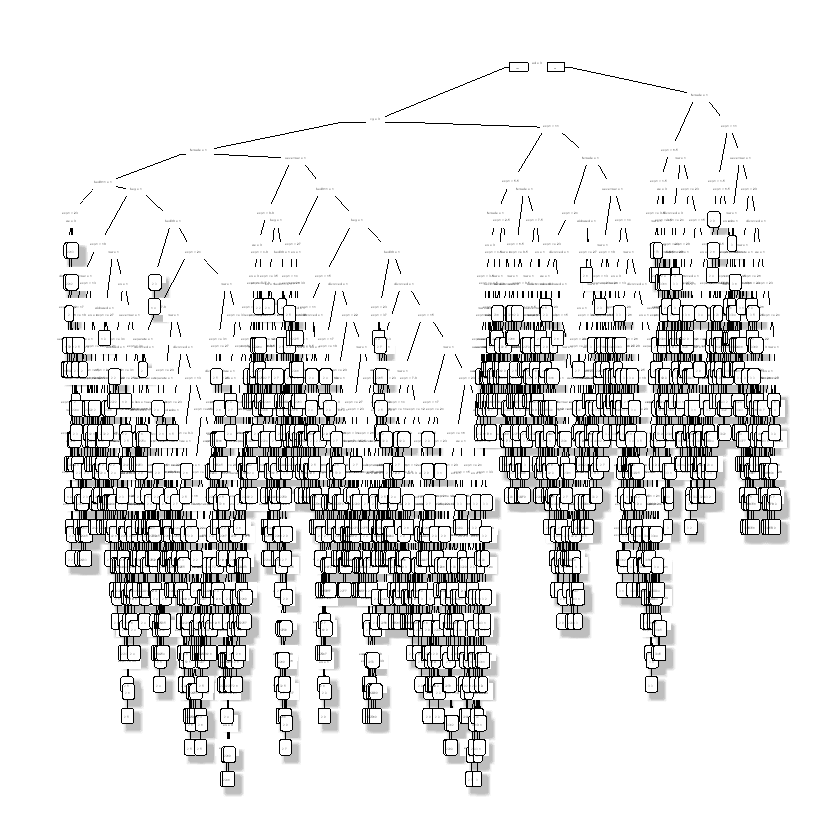

In [66]:
# tree
fit.trees <- rpart(formula_basic, data_train, cp = 0)
prp(fit.trees, leaf.round=1, space=2, yspace=2, split.space=2, shadow.col = "gray", trace = 1) # plotting the tree

#### Prune tree regresion

An important method to improve predictive performance is called "Pruning the Tree". This
means the process of cutting down the branches of a tree. We apply pruning to the complex tree above to reduce the depth. Initially, we determine the optimal complexity of the regression tree.

cex 0.538   xlim c(0, 1)   ylim c(0, 1)


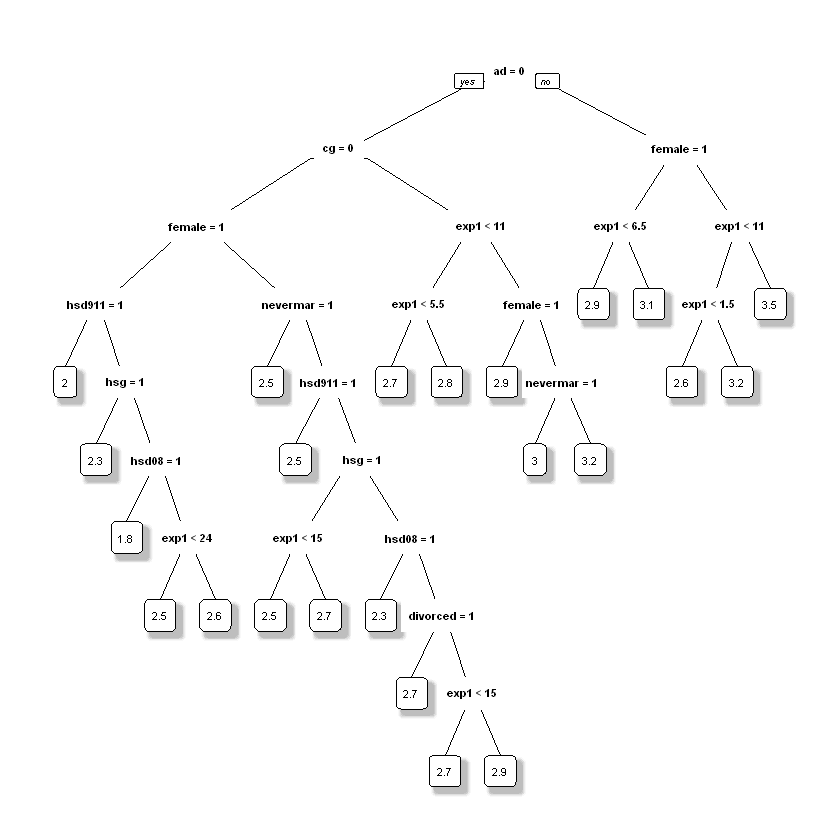

In [67]:
fit.trees <- rpart(formula_basic, data_train, cp = 0.001)
prp(fit.trees, leaf.round=1, space=2, yspace=2, split.space=2, shadow.col = "gray", trace = 1) # plotting the tree

In [68]:
fit.trees$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.081430568,0,1.0000000,1.0000661,0.02439466
2,0.066583565,1,0.9185694,0.9186953,0.02395927
3,0.023898064,2,0.8519859,0.8522100,0.02370428
4,0.012678659,3,0.8280878,0.8283599,0.02356925
5,0.010605052,4,0.8154091,0.8163259,0.02367407
6,0.009387934,5,0.8048041,0.8073898,0.02376217
7,0.007983296,6,0.7954162,0.7963475,0.02363006
8,0.004177217,7,0.7874329,0.7884293,0.02355477
9,0.002648821,8,0.7832556,0.7851567,0.02353832
10,0.002615364,10,0.7779580,0.7821894,0.02362792


In [70]:
which.min(fit.trees$cptable[,"xerror"])

21 
21

In [71]:
bestcp<- fit.trees$cptable[which.min(fit.trees$cptable[,"xerror"]),"CP"]
bestcp

[1] 0.001

Now, we can prune the tree and visualize the prediction rule

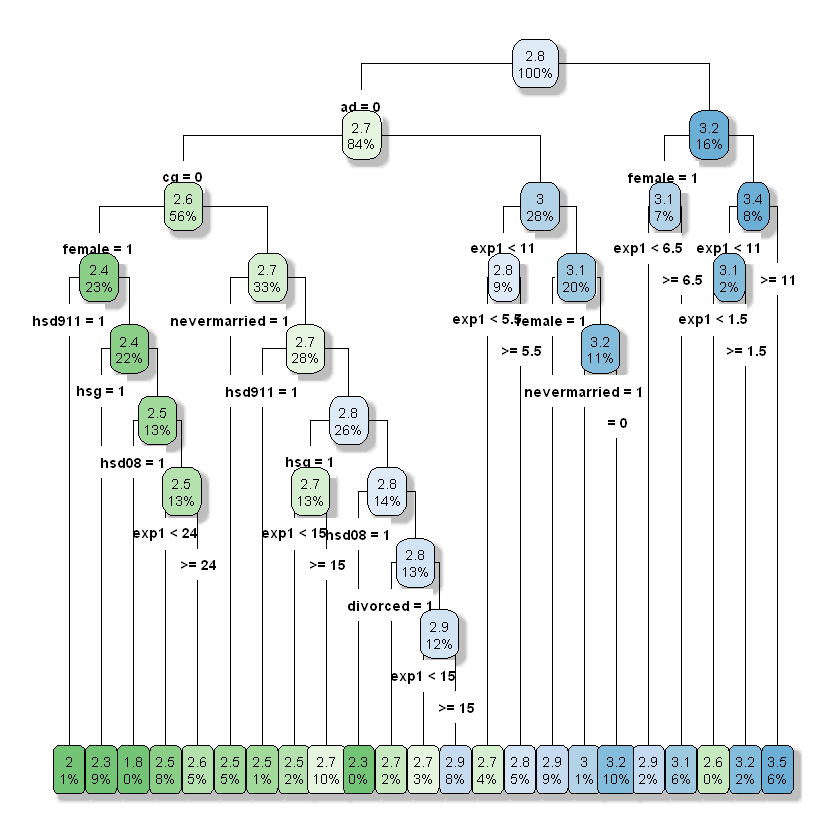

In [72]:
fit.prunedtree <- prune(fit.trees, cp=bestcp)
plot1 <- rpart.plot(fit.prunedtree,leaf.round=1, space=1, yspace=1.5, split.space=1, shadow.col = "gray", type =4,
          branch = 1, box.palette="GnBu", cex = 0.7)

Finally, we calculate the mean-squared error and the $R^2$ on the test sample to evaluate the out-of-sample performance of the pruned tree.

In [75]:
yhat.pt <- predict(fit.prunedtree,newdata=data_test)

MSE.pt <- summary(lm((Y_test-yhat.pt)^2~1))$coef[1:2]
R2.pt  <- 1-MSE.pt[1]/var(Y_test)

# R^2 of the pruned tree
cat("R^2 of the pruned tree:",R2.pt)

R^2 of the pruned tree: 0.2135014

In [76]:
MSE.pt
R2.pt

[1] 0.34912297 0.02221324

[1] 0.2135014

#### RESULTS

In [80]:
library(xtable)
table<- matrix(0, 13, 3)
table[1,1:2]   <- MSE.lm.basic
table[2,1:2]   <- MSE.lm.flex
table[3,1:2]   <- MSE.lasso
table[4,1:2]   <- MSE.lasso.post
table[5,1:2]   <- MSE.lasso.flex
table[6,1:2]   <- MSE.lasso.post.flex
table[7,1:2]   <- MSE.lasso.cv
table[8,1:2]   <- MSE.ridge
table[9,1:2]   <- MSE.elnet
table[10,1:2]   <- MSE.lasso.cv.flex
table[11,1:2]  <- MSE.ridge.flex
table[12,1:2]  <- MSE.elnet.flex
table[13,1:2]  <- MSE.pt



table[1,3]   <- R2.lm.basic
table[2,3]   <- R2.lm.flex
table[3,3]   <- R2.lasso
table[4,3]   <- R2.lasso.post
table[5,3]   <- R2.lasso.flex
table[6,3]   <- R2.lasso.post.flex
table[7,3]   <- R2.lasso.cv
table[8,3]   <- R2.ridge
table[9,3]   <- R2.elnet
table[10,3]   <- R2.lasso.cv.flex
table[11,3]  <- R2.ridge.flex
table[12,3]  <- R2.elnet.flex
table[13,3]  <- R2.pt




colnames(table)<- c("MSE", "S.E. for MSE", "R-squared")
rownames(table)<- c("Least Squares (basic)","Least Squares (flexible)", "Lasso", "Post-Lasso","Lasso (flexible)","Post-Lasso (flexible)", 
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)","Cross-Validated elnet (flexible)", "Pruned Tree")
tab <- xtable(table, digits =3)
tab

,MSE,S.E. for MSE,R-squared
,<dbl>,<dbl>,<dbl>
Least Squares (basic),0.3424951,0.02194119,0.2284326
Least Squares (flexible),0.3430466,0.02182079,0.2271902
Lasso,0.3441529,0.02178260,0.2246978
Post-Lasso,0.3448897,0.02177830,0.2230380
Lasso (flexible),0.3436514,0.02175320,0.2258277
Post-Lasso (flexible),0.3440833,0.02180463,0.2248546
Cross-Validated lasso,0.3556191,0.02167521,0.1988669
Cross-Validated ridge,0.3514280,0.02166112,0.2083085
Cross-Validated elnet,0.3510067,0.02166031,0.2092577


In [88]:
which.min(tab[,"MSE"]) # Least squared (basic)
which.max(tab[,"MSE"]) # Cross-Validated lasso
which.min(tab[,"R-squared"]) # Cross-Validated lasso
which.max(tab[,"R-squared"]) # Least squared (basic)

[1] 1

[1] 7

[1] 7

[1] 1

The summary table above shows the MSE test in the first column, the MSE standard error in column two, and the R2 test in column 3. The OLS basic model is the best performer among all models showing the MSE more low and R2 higher. On the other hand, the cross validation lasso model is the one that performs the worst among the models since it presents the highest MSE and the lowest R2. Finally, the only nonlinear model, the prune tree regression is not too bad, but there are other nonlinear models that can improve that regression.

### How to buid a tree regression?

#### Tree-building process

- First of all, the process is a top-down approach because it starts at the top by mentioning which is the predictor that most affects the outcome variable (output) and chooses the cutoff that minimizes the residual sum of squares in each group divided by the cutoff $ \sum_{i \in R_j} (Y_i - \hat{Y_{Rj}})^2 $ swhere the estimated value of Y is the mean of the Y values for the observations in $Rj$.Therefore, it is also called a greedy approach because at each step of the construction process the best split occurs at that particular step without looking ahead.  
- Starting from the first predictor, the predictor space is successively divided, choosing at each step which predictor most affects or determines the result variable. That way, it ultimately generates regions $ R_1, R_2, ... , R_J $, called terminal nodes or leaves, which are the mean of the values of the dependent variable for the observations in that region, given the predictors that are most measure determine Y in that region.
- The goal is to find the regions $ R_1, R_2, ... , R_J $ that minimize the residual sum of squares (RSS):
\begin{align}
\sum_{j=1}^{j} \sum_{i \in R_j} (Y_i - \hat{Y_{Rj}})^2
\end{align}
where $ \hat{Y_{Rj}} $ is the mean response for the training observations within the jth box.

#### Pruning regression trees

The deeper the tree, that is, the more we decompose and divide the observations according to the predictors, the better the approximation to the regression function. However, it increases the estimation noise because there are fewer observations per terminal node to estimate the predicted value of the node. To improve the predictive performance it is necessary to "prune the tree" or cut branches. The pruning regression tree tries to find the correct depth.